In [1]:
from bs4 import BeautifulSoup
import urllib
import json
import os
import re
import requests
import pandas as pd
import re
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [24]:
main_url = 'https://www.tentree.com/collections/mens-t-shirts-tanks'

## Mens

In [3]:
def grab_tt():
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get('https://www.tentree.com/collections/mens-t-shirts-tanks',
                            headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [27]:
def parse_tt_test(soup):
    elements = []

    beginning = "{\"products\": "
    end = "}"

    script = soup.findAll('script')[51].text.strip()[130: -842]

    # Mens range: [130:-1060]

    script2 = beginning + script + end

    # data = json.loads(script2)

    return script2

In [26]:
def parse_tt(soup):
    elements = []

    beginning = "{\"products\": "
    end = "}"

    script = soup.findAll('script')[51].text.strip()[130: -842]

    # Mens range: [130:-1060]

    script2 = beginning + script + end

    data = json.loads(script2)

    return data

In [35]:
def item_list(items_dict):
    i = 0
    items_list = []
    urls = []

    for shirt in items_dict['products']:
        j = 0
        for variant in items_dict['products'][i]['variants']:
            inner_list = []

            shirt_name = items_dict['products'][i]['title']
            inner_list.append(shirt_name)

            image_url = items_dict['products'][i]['image']
            image_url = main_url + image_url
            inner_list.append(image_url)

            variant_color = items_dict['products'][i]['variants'][j]['options'][0]
            inner_list.append(variant_color)

            variant_size = items_dict['products'][i]['variants'][j]['options'][1]
            inner_list.append(variant_size)

            variant_url = str(items_dict['products'][0]['variants'][0]['variant_color_url'])
            variant_url_f = main_url + variant_url
            inner_list.append(variant_url_f)
            urls.append(variant_url)

            variant_price = (items_dict['products'][0]['variants'][0]['price'] / 100)
            inner_list.append(variant_price)

            items_list.append(inner_list)

            j += 1

        i += 1

    # columns_ = ['Name', 'image_url', 'color', 'size', 'item_url', 'price']

    return items_list, urls

In [6]:
def grab_ind_tt(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get(url, headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [40]:
def new_urls_(urls_):
    new_urls = []
    for url in urls_:
        new_url = url.replace(" ", "%20")
        new_urls.append(new_url)

    return new_urls

In [44]:
  main_url = 'https://www.tentree.com/collections/mens-t-shirts-tanks'

  # soup = grab_tt()

  # print(soup)

  # items_dict = parse_tt_test(soup)
  items_dict = parse_tt(soup)

  # print(items_dict)

  items_, urls_ = item_list(items_dict) 

  new_urls = new_urls_(urls_)

  # Elements: fit/details, material, wash instructions, manufacturing info

  elements_all = []
  i = 0
  for site in new_urls:
      test_url = main_url + site

      soup2 = grab_ind_tt(test_url)

      soup3 = soup2.find('div', class_='product-description')
      soup3 = soup3.findAll('li', class_='')

      elements = []
      for i_ in soup3:
          for j_ in i_.contents:
              new_ele = str(j_).replace('??', '')
              elements.append(new_ele)

      elements_all.append(elements)

      i += 1


  i = 0
  for list_ in items_:
      j = 0
      for ele in elements_all[i]:
          list_.append(ele)
          j += 1
      i += 1


  headers = ['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'wash_dir', 'ethical_url']

  df_mens_tt = pd.DataFrame(items_, columns=headers)

  print(items_)
  print(len(items_))

[['Lorax Unless T-Shirt', 'https://www.tentree.com/collections/mens-t-shirts-tanks1/2341/3995/products/TCM4833-23151.jpg?v=1634833590', 'TWILIGHT BLUE', 'S', 'https://www.tentree.com/collections/mens-t-shirts-tanks/products/mens-lorax-unless-t-shirt?TWILIGHT BLUE', 40.0, 'Regular fit crew neck t-shirt, medium stretch', '45% REPREVE® Recycled Polyester, 30% TENCEL™ Lyocell, 25% Organic Cotton', 'Wash cold, tumble dry low', '<a href="/pages/ethical-manufacturing" target="_blank">Designed in Canada, ethically made in China</a>'], ['Lorax Unless T-Shirt', 'https://www.tentree.com/collections/mens-t-shirts-tanks1/2341/3995/products/TCM4833-23151.jpg?v=1634833590', 'TWILIGHT BLUE', 'M', 'https://www.tentree.com/collections/mens-t-shirts-tanks/products/mens-lorax-unless-t-shirt?TWILIGHT BLUE', 40.0, 'Regular fit crew neck t-shirt, medium stretch', '45% REPREVE® Recycled Polyester, 30% TENCEL™ Lyocell, 25% Organic Cotton', 'Wash cold, tumble dry low', '<a href="/pages/ethical-manufacturing" ta

In [45]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url
0,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
1,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
2,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
3,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,XL,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
4,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,METEORITE BLACK,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
...,...,...,...,...,...,...,...,...,...,...
205,National Geographic Redwood Unisex T-Shirt,https://www.tentree.com/collections/mens-t-shi...,JET BLACK,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
206,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,XXS,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
207,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
208,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."


In [46]:
df_mens_tt[['material1', 'material2', 'material3']] = df_mens_tt['materials'].str.split(",", expand=True)

In [47]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,material1,material2,material3
0,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
1,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
2,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
3,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,XL,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
4,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,METEORITE BLACK,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,National Geographic Redwood Unisex T-Shirt,https://www.tentree.com/collections/mens-t-shi...,JET BLACK,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
206,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,XXS,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
207,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
208,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton


Add gender

In [48]:
df_mens_tt['gender'] = "mens"

In [49]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,material1,material2,material3,gender
0,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
1,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
2,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
3,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,XL,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
4,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,METEORITE BLACK,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,National Geographic Redwood Unisex T-Shirt,https://www.tentree.com/collections/mens-t-shi...,JET BLACK,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
206,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,XXS,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
207,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens
208,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton,mens


Reordering columns

In [50]:
df_mens_tt = df_mens_tt[['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'wash_dir', 'ethical_url', 'gender', 'material1', 'material2', 'material3']]

In [51]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender,material1,material2,material3
0,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
1,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
2,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
3,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,XL,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
4,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,METEORITE BLACK,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,National Geographic Redwood Unisex T-Shirt,https://www.tentree.com/collections/mens-t-shi...,JET BLACK,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
206,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,XXS,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
207,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
208,National Geographic Banner Unisex Longsleeve,https://www.tentree.com/collections/mens-t-shi...,AFTERGLOW,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton


## EDA

In [ ]:
plot_order1 = df_mens_tt.groupby('price')['price'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


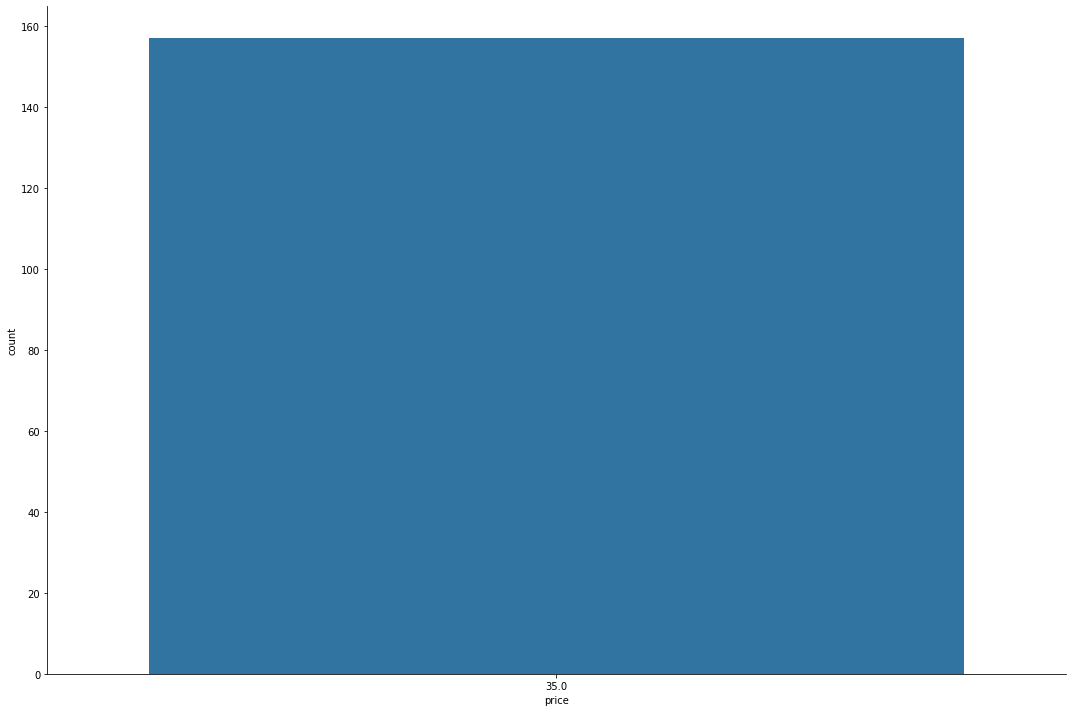

In [ ]:
sn.catplot('price', data=df_mens_tt, kind='count', height=10, aspect=1.5, order=plot_order1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


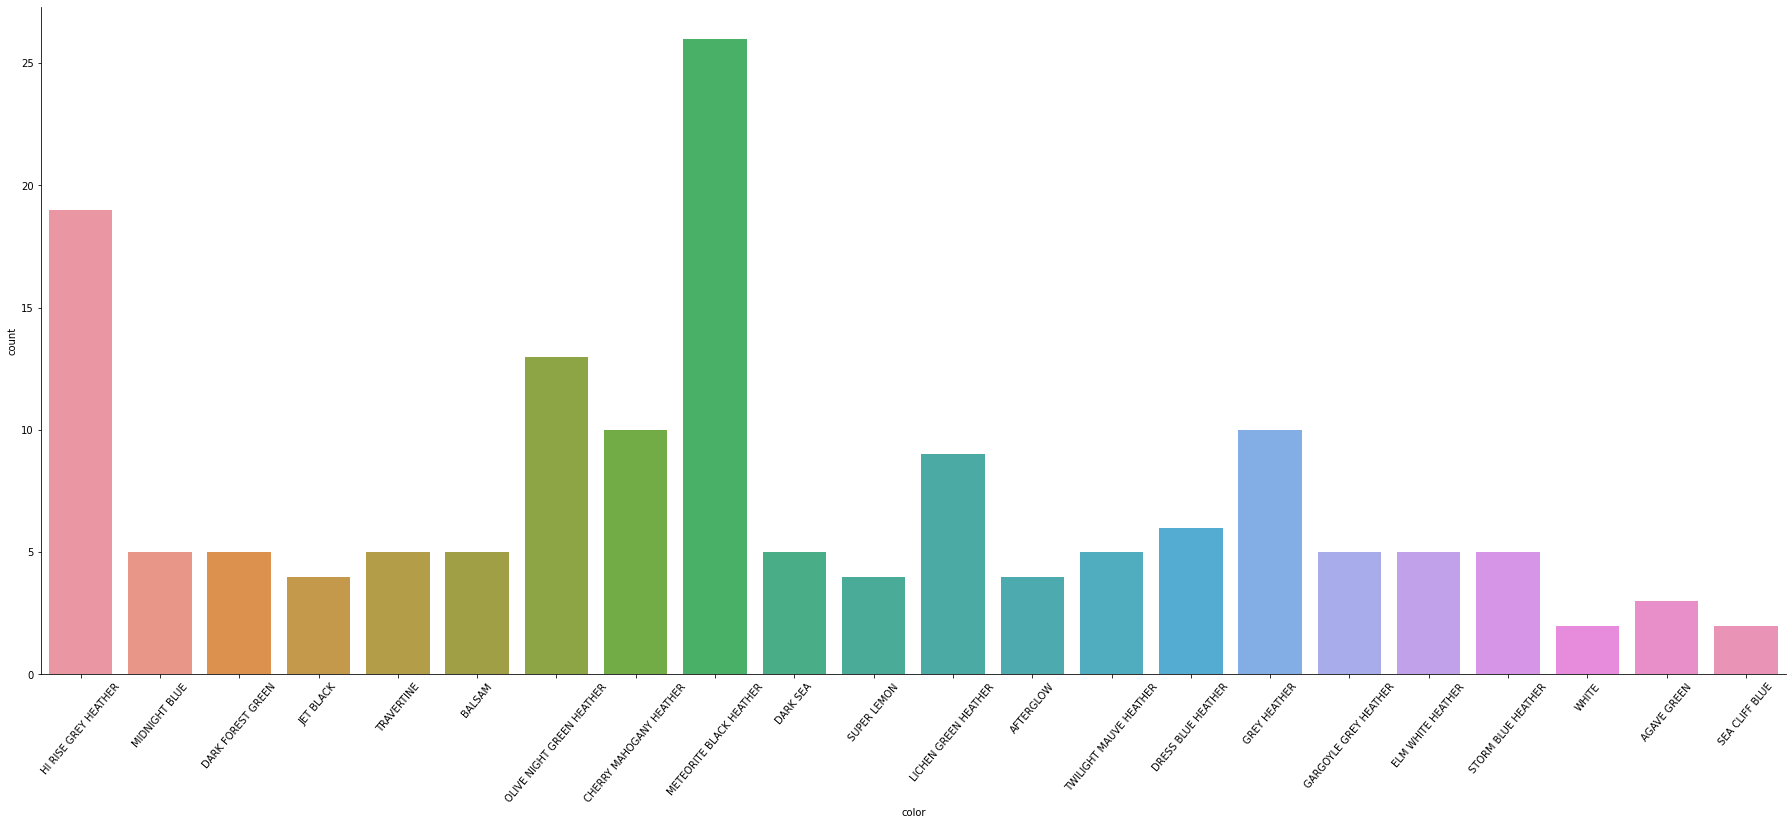

In [ ]:
g = sn.catplot('color', data=df_mens_tt, kind='count', height=10, aspect=2.5)
g.set_xticklabels(rotation=50)

In [ ]:
g = sns.barplot(x=["Asia", "Africa", "Antartica", "Europe"],
                y=[90, 30, 60, 10])
g.set_xticklabels(
    labels=["Asia", "Africa", "Antartica", "Europe"], rotation=30)
# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


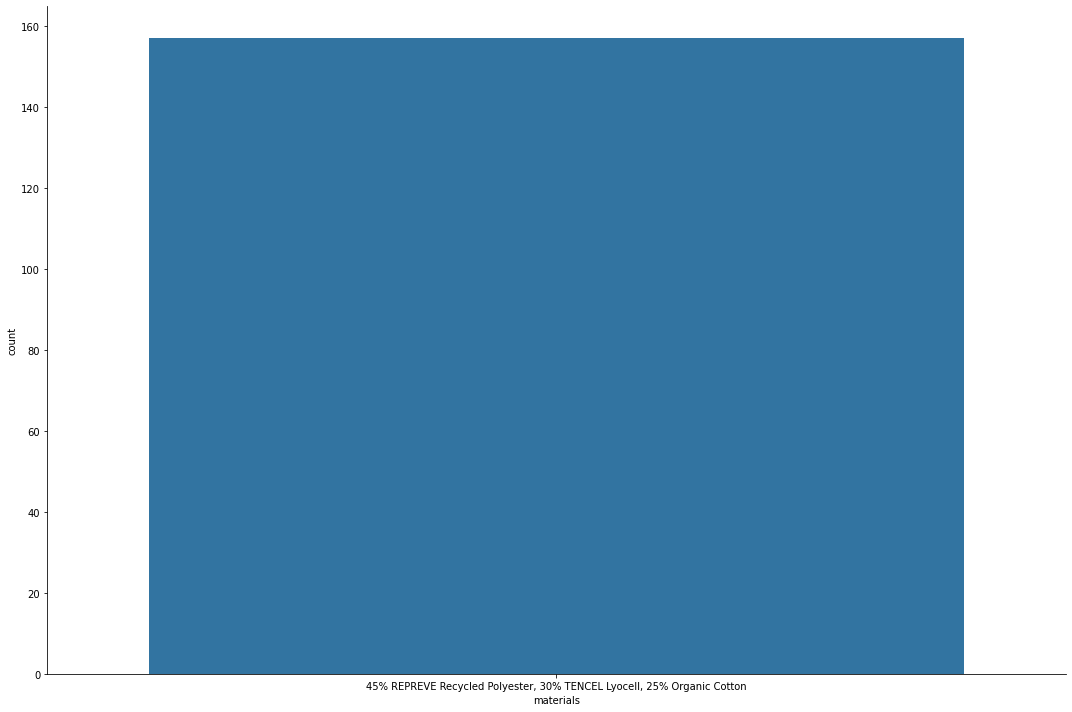

In [ ]:
sn.catplot('materials', data=df_mens_tt, kind='count', height=10, aspect=1.5)

# Phase II:

## Womens

In [57]:
main_url_w = 'https://www.tentree.com/collections/womens-t-shirts-tanks'

In [52]:
def grab_tt_w():
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get('https://www.tentree.com/collections/womens-t-shirts-tanks',
                            headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [82]:
def parse_tt_w(soup):
    elements = []

    beginning = "{\"products\": "
    end = "}"

    script = soup.findAll('script')[51].text.strip()[130: -1033]

    # Mens range: [130:-1060]

    script2 = beginning + script + end

    data = json.loads(script2)

    return data

In [80]:
def parse_tt_w_test(soup):
    elements = []

    beginning = "{\"products\": "
    end = "}"

    script = soup.findAll('script')[51].text.strip()[130: -1033]

    # Mens range: [130:-1060]

    script2 = beginning + script + end

    # data = json.loads(script2)

    return script2

In [86]:
def item_list_(items_dict):
    i = 0
    items_list = []
    urls = []

    for shirt in items_dict['products']:
        j = 0
        for variant in items_dict['products'][i]['variants']:
            inner_list = []

            shirt_name = items_dict['products'][i]['title']
            inner_list.append(shirt_name)

            image_url = items_dict['products'][i]['image']
            image_url_f = main_url_w + image_url
            inner_list.append(image_url_f)

            variant_color = items_dict['products'][i]['variants'][j]['options'][0]
            inner_list.append(variant_color)

            variant_size = items_dict['products'][i]['variants'][j]['options'][1]
            inner_list.append(variant_size)

            variant_url = str(items_dict['products'][0]['variants'][0]['variant_color_url'])
            variant_url_f = main_url_w + variant_url
            inner_list.append(variant_url_f)
            urls.append(variant_url)

            variant_price = (items_dict['products'][0]['variants'][0]['price'] / 100)
            inner_list.append(variant_price)

            items_list.append(inner_list)

            j += 1

        i += 1

    # columns_ = ['Name', 'image_url', 'color', 'size', 'item_url', 'price']

    return items_list, urls

In [55]:
def grab_ind_tt(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get(url, headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [56]:
def new_urls(urls_):
    new_urls = []
    for url in urls_:
        new_url = url.replace(" ", "%20")
        new_urls.append(new_url)

    return new_urls

## Run the scrape

In [87]:
  main_url = 'https://www.tentree.com/collections/womens-t-shirts-tanks'

  soup_w = grab_tt_w()

  # print(soup_w)

  items_dict = parse_tt_w(soup)
  # script = parse_tt_w_test(soup_w)

  # print(items_dict)
  # print(script)

  items_w, urls_ = item_list(items_dict)

  # print(urls_)

  ## Remove the new_urls() as the womens urls are structured differently
  new_urls = urls_

  # Elements: fit/details, material, wash instructions, manufacturing info
  elements_all = []
  i = 0
  for site in new_urls:
      test_url = main_url + site

      soup2 = grab_ind_tt(test_url)

      soup3 = soup2.find('div', class_='product-description')
      soup3 = soup3.findAll('li', class_='')

      elements = []
      for i_ in soup3:
          for j_ in i_.contents:
              new_ele = str(j_).replace('??', '')
              elements.append(new_ele)

      elements_all.append(elements)

      i += 1


  i = 0
  for list_ in items_w:
      j = 0
      for ele in elements_all[i]:
          list_.append(ele)
          j += 1
      i += 1

  headers = ['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'wash_dir', 'ethical_url']

  df_womens_tt = pd.DataFrame(items_w, columns=headers)

  # df.to_csv('tentree_mens.csv', index=False, header=headers)


KeyboardInterrupt: ignored

In [88]:
  print(items_w)
  print(len(items_w))

[['The Lorax T-Shirt', 'https://www.tentree.com/collections/womens-t-shirts-tanks1/2341/3995/products/TCW4834-0164.jpg?v=1634833601', 'METEORITE BLACK', 'XS', 'https://www.tentree.com/collections/womens-t-shirts-tanks/products/womens-lorax-t-shirt?METEORITE BLACK', 40.0], ['The Lorax T-Shirt', 'https://www.tentree.com/collections/womens-t-shirts-tanks1/2341/3995/products/TCW4834-0164.jpg?v=1634833601', 'METEORITE BLACK', 'S', 'https://www.tentree.com/collections/womens-t-shirts-tanks/products/womens-lorax-t-shirt?METEORITE BLACK', 40.0], ['The Lorax T-Shirt', 'https://www.tentree.com/collections/womens-t-shirts-tanks1/2341/3995/products/TCW4834-0164.jpg?v=1634833601', 'METEORITE BLACK', 'M', 'https://www.tentree.com/collections/womens-t-shirts-tanks/products/womens-lorax-t-shirt?METEORITE BLACK', 40.0], ['The Lorax T-Shirt', 'https://www.tentree.com/collections/womens-t-shirts-tanks1/2341/3995/products/TCW4834-0164.jpg?v=1634833601', 'METEORITE BLACK', 'L', 'https://www.tentree.com/col

In [89]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url
0,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
1,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
2,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,M,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
3,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
4,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
...,...,...,...,...,...,...,...,...,...,...
225,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,BLACK OLIVE GREEN,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
226,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
227,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."
228,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=..."


In [90]:
df_womens_tt['gender'] = "womens"

In [91]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender
0,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
1,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
2,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,M,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
3,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
4,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
...,...,...,...,...,...,...,...,...,...,...,...
225,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,BLACK OLIVE GREEN,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
226,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
227,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens
228,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens


In [93]:
df_womens_tt[['material1', 'material2', 'material3']] = df_womens_tt['materials'].str.split(",", expand=True)

In [94]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender,material1,material2,material3
0,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
1,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
2,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,M,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
3,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
4,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,BLACK OLIVE GREEN,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
226,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
227,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
228,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton


Reorder womens df

In [96]:
df_womens_tt = df_womens_tt[['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'wash_dir', 'ethical_url', 'gender', 'material1', 'material2', 'material3']]

In [97]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender,material1,material2,material3
0,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
1,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
2,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,M,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
3,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
4,The Lorax T-Shirt,https://www.tentree.com/collections/womens-t-s...,METEORITE BLACK,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,BLACK OLIVE GREEN,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
226,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
227,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
228,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton


Combining dfs (stack)

In [98]:
total_tentree = pd.concat([df_mens_tt,df_womens_tt], ignore_index=True)

In [99]:
total_tentree

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender,material1,material2,material3
0,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
1,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,M,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
2,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,L,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
3,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,TWILIGHT BLUE,XL,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
4,Lorax Unless T-Shirt,https://www.tentree.com/collections/mens-t-shi...,METEORITE BLACK,S,https://www.tentree.com/collections/mens-t-shi...,40.0,"Regular fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,BLACK OLIVE GREEN,XL,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
436,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,XS,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
437,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,S,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton
438,Peaks Embroidery T-Shirt,https://www.tentree.com/collections/womens-t-s...,STORM BLUE,L,https://www.tentree.com/collections/womens-t-s...,40.0,"Relaxed fit crew neck t-shirt, medium stretch","45% REPREVE® Recycled Polyester, 30% TENCEL™ L...","Wash cold, tumble dry low","<a href=""/pages/ethical-manufacturing"" target=...",womens,45% REPREVE® Recycled Polyester,30% TENCEL™ Lyocell,25% Organic Cotton


df to csv

In [100]:
total_tentree.to_csv('tentree.csv')

In [101]:
!cp tentree.csv "drive/My Drive/Drexel/DSCI591/data"